In [1]:
# Logistic regression is a statistical method for analyzing a 
# dataset in which there are one or more independent variables
# that determine an outcome. The outcome is measured with a 
# dichotomous variable (in which there are only two possible
# outcomes).

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
train = pd.read_csv('C:/Users/HP/Desktop/mll/ML Batch/titanic_train.csv')
test = pd.read_csv('C:/Users/HP/Desktop/mll/ML Batch/titanic_test.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Select all the data.
# Go to Home > Conditional Formatting > New rule.
# Click on “Format only cells that contain”
# Change “Cell Value” option to “Blanks”

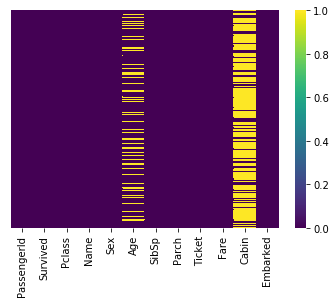

In [6]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=True,cmap='viridis')
# cbar : boolean, optional: Whether to draw a colorbar.
# new matplotlib default colormap (“viridis”) 

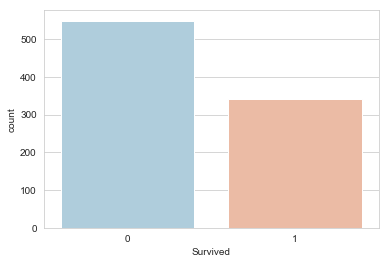

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train,palette='RdBu_r')

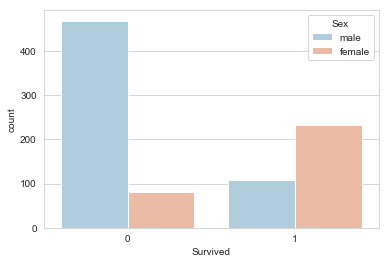

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

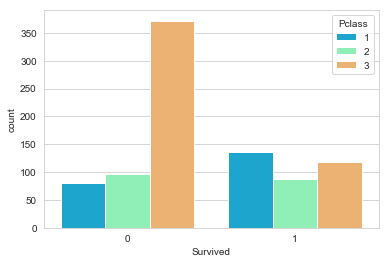

In [9]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

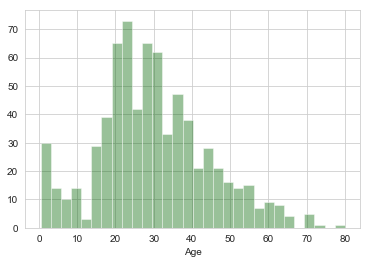

In [10]:
sns.distplot(train['Age'].dropna(),kde=False,color='darkgreen',bins=30)
# kde : bool, optional, whether to plot a gaussian kernel density estimate.
# bins denotes number of class intervals

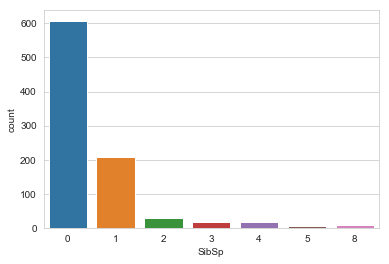

In [11]:
sns.countplot(x='SibSp',data=train,)

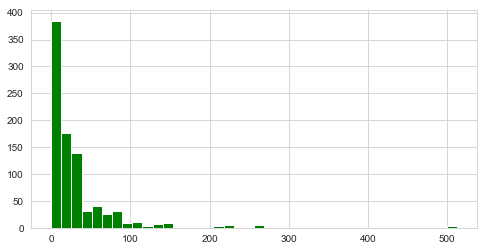

In [12]:
train['Fare'].hist(color='green',bins=40,figsize=(8,4))

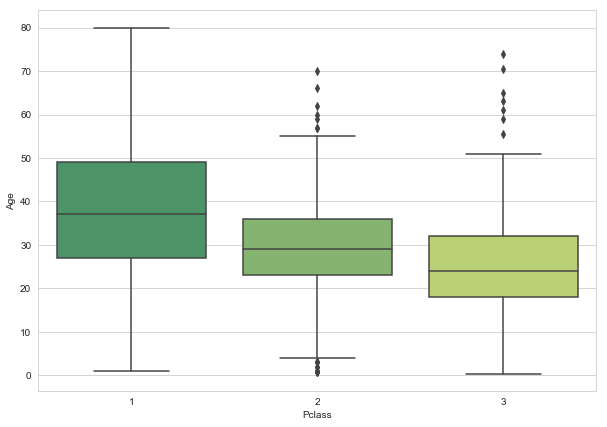

In [13]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='summer')

In [14]:
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        
        elif Pclass == 2:
            return 29
        
        else:
            return 24
    else:
        return Age

In [15]:
train.head(n=10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [16]:
train['Age']=train[['Age','Pclass']].apply(impute_age,axis=1)
train.head(n=10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,24.0,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


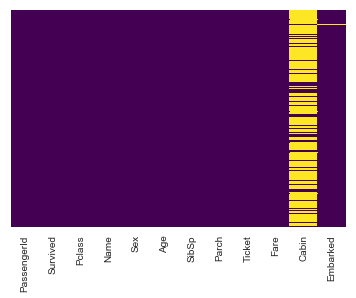

In [17]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [18]:
train.drop('Cabin',inplace=True,axis=1)

In [19]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [20]:
print(train[61:62])
train.dropna(inplace=True)
print(train[61:62])

    PassengerId  Survived  Pclass                 Name     Sex   Age  SibSp  \
61           62         1       1  Icard, Miss. Amelie  female  38.0      0   

    Parch  Ticket  Fare Embarked  
61      0  113572  80.0      NaN  
    PassengerId  Survived  Pclass                         Name   Sex   Age  \
62           63         0       1  Harris, Mr. Henry Birkhardt  male  45.0   

    SibSp  Parch Ticket    Fare Embarked  
62      1      0  36973  83.475        S  


In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [22]:
# Convert categorical variable into dummy/indicator variables
sex=pd.get_dummies(train['Sex'],drop_first=False)
embark=pd.get_dummies(train['Embarked'],drop_first=False)

print(train['Sex'].head())
print("sex -> \n",sex.head())
print(train['Embarked'].head())
print("embark -> \n",embark.head())

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object
sex -> 
    female  male
0       0     1
1       1     0
2       1     0
3       1     0
4       0     1
0    S
1    C
2    S
3    S
4    S
Name: Embarked, dtype: object
embark -> 
    C  Q  S
0  0  0  1
1  1  0  0
2  0  0  1
3  0  0  1
4  0  0  1


In [23]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [24]:
train=pd.concat([train,sex,embark],axis=1)

In [25]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,1,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [26]:
# guasian curve means that the predictions are right for the data set

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x_train,x_test,y_train,y_test=train_test_split(train.drop('Survived',axis=1),train['Survived'],test_size=0.30,random_state=101)
print("No. of Train rows -> ",len(y_train))
print("No. of Test rows -> ",len(y_test))

No. of Train rows ->  622
No. of Test rows ->  267


In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
logmodel=LogisticRegression()
logmodel.fit(x_train,y_train)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [31]:
predictions=logmodel.predict(x_test)
predictions,len(predictions)

(array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
        0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
        1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
        0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
        1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
        1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
        0, 1, 1], dtype=int64), 267)

In [32]:
from sklearn.metrics import classification_report

In [33]:
# Precision = TP/(TP + FP)   TP : true positive FP : false positive
# Precision measures how many of the samples 
# predicted as positive are actually positive
# Precision is also known as positive predictive value (PPV)

# Recall = TP/(TP + FN)    FN : false negative
# measures how many of the positive samples are captured
# by the positive predictions:
# Other names for recall are sensitivity, hit rate,
# or true positive rate (TPR).

# F1-score = 2 x (precision x recall)/(precision + recall)
# f-score or f-measure, which is with the harmonic mean of
# precision and recall

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       163
           1       0.84      0.68      0.75       104

   micro avg       0.82      0.82      0.82       267
   macro avg       0.83      0.80      0.81       267
weighted avg       0.83      0.82      0.82       267



In [34]:
from sklearn.metrics import confusion_matrix

In [35]:
print(confusion_matrix(y_test,predictions))
# confusion_matrix(y_test,predictions)
confusion_df = pd.DataFrame(confusion_matrix(y_test,predictions),
             columns=["Predicted Class " + str(class_name) for class_name in [0,1]],
             index = ["Class " + str(class_name) for class_name in [0,1]])

print(confusion_df)

#                 predicted     
# actual    class-0      class-1
# class-0      TN           FP   
# class-1      FN           TP

[[149  14]
 [ 33  71]]
         Predicted Class 0  Predicted Class 1
Class 0                149                 14
Class 1                 33                 71


In [36]:
# Precision = TP/(TP + FP)
# Recall = TP/(TP + FN)
# F1-score = 2 x (precision x recall)/(precision + recall)
#                 predicted     
#           class-0      class-1
# class-0   TN (151)     FP (12)  
# class-1   FN (36)      TP (68)
#      precision         recall             f1-score                     support
#   0  151/(151+36)=0.81 151/(151+12)=0.93  2*0.81*0.93/(0.81+0.93)=0.86 151+12=163
#   1  68/(68+12)=0.85   68/(68+36)=0.65    2*0.85*0.65/(0.85+0.65)=0.74 36+68=104
#avg/total   (151+68)/(151+12  (151+68)/(151+12   2*0.82*0.82/(0.82+0.82)=0.81 163+104=267
#       +36+68)=0.82      +36+68)=0.82

In [37]:
print(logmodel.coef_)

[[ 2.88456430e-04 -9.44837803e-01 -3.40136315e-02 -2.32114931e-01
  -1.08287809e-01  2.87350814e-03  2.04126798e+00 -4.76312436e-01
   7.14654888e-01  4.80896449e-01  3.69404205e-01]]


In [38]:
print(logmodel.intercept_)

[1.56495554]


In [39]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


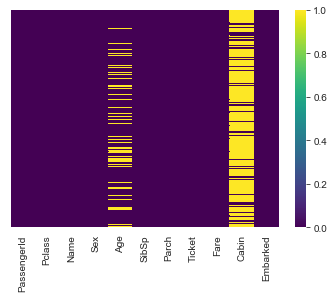

In [40]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=True,cmap='viridis')

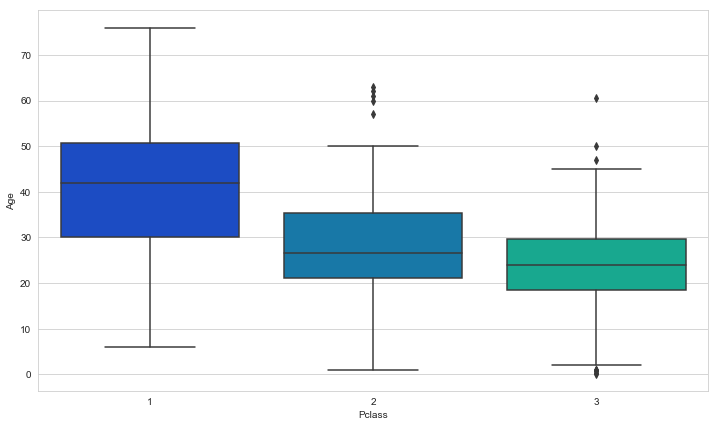

In [41]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=test,palette='winter')

In [42]:
test['Age']=test[['Age','Pclass']].apply(impute_age,axis=1)

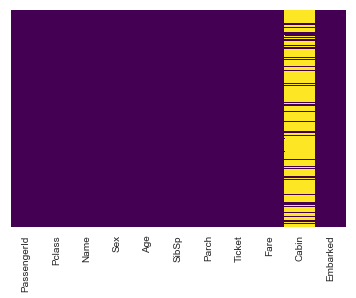

In [43]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [44]:
test.drop('Cabin',inplace=True,axis=1)

In [45]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [46]:
test.dropna(inplace=True)

In [47]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 0 to 417
Data columns (total 10 columns):
PassengerId    417 non-null int64
Pclass         417 non-null int64
Name           417 non-null object
Sex            417 non-null object
Age            417 non-null float64
SibSp          417 non-null int64
Parch          417 non-null int64
Ticket         417 non-null object
Fare           417 non-null float64
Embarked       417 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 35.8+ KB


In [48]:
sex=pd.get_dummies(test['Sex'],drop_first=True)
embark=pd.get_dummies(test['Embarked'],drop_first=True)

In [49]:
test.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [50]:
test=pd.concat([test,sex,embark],axis=1)

In [51]:
test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,3,34.5,0,0,7.8292,1,1,0
1,893,3,47.0,1,0,7.0000,0,0,1
2,894,2,62.0,0,0,9.6875,1,1,0
3,895,3,27.0,0,0,8.6625,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,1


In [52]:
x_train,x_test,y_train,y_test=train_test_split(test.drop('male',axis=1),test['male'],test_size=0.30,random_state=101)
print(len(x_train),len(x_test),len(y_train),len(y_test))

291 126 291 126


In [53]:
logmodel.fit(x_train,y_train)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [54]:
predictions=logmodel.predict(x_test)

In [55]:
# Precision = TP/(TP + FP)
# Precision measures how many of the samples 
# predicted as positive are actually positive
# Precision is also known as positive predictive value (PPV)

# Recall = TP/(TP + FN)
# measures how many of the positive samples are captured
# by the positive predictions:
# Other names for recall are sensitivity, hit rate,
# or true positive rate (TPR).

# F1-score = 2 x (precision x recall)/(precision + recall)
# f-score or f-measure, which is with the harmonic mean of
# precision and recall

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.54      0.11      0.19        61
           1       0.52      0.91      0.66        65

   micro avg       0.52      0.52      0.52       126
   macro avg       0.53      0.51      0.43       126
weighted avg       0.53      0.52      0.43       126



In [56]:
# confusion_matrix(y_test,predictions)
confusion_df = pd.DataFrame(confusion_matrix(y_test,predictions),
             columns=["Predicted Class " + str(class_name) for class_name in [0,1]],
             index = ["Class " + str(class_name) for class_name in [0,1]])

print(confusion_df)
#                 predicted     
#           class-0      class-1
# class-0      TN           FP   
# class-1      FN           TP

         Predicted Class 0  Predicted Class 1
Class 0                  7                 54
Class 1                  6                 59


In [57]:
# Precision = TP/(TP + FP)
# Recall = TP/(TP + FN)
# F1-score = 2 x (precision x recall)/(precision + recall)
#                 predicted     
#           class-0      class-1
# class-0   TN (151)     FP (12)  
# class-1   FN (36)      TP (68)
#      precision         recall             f1-score                     support
#   0  7/(7+6)=0.54      7/(7+54)=0.11      2*0.54*0.11/(0.54+0.11)=0.19 7+54=61
#   1  59/(59+54)=0.52   59/(59+6)=0.91     2*0.52*0.91/(0.52+0.91)=0.66 6+59=65
#T/A   (7+59)/(7+54      (7+59)/(7+54       2*0.52*0.52/(0.52+0.52)=0.52 61+65=126
#       +6+59)=0.52       +6+59)=0.52

In [58]:
print(logmodel.coef_)

[[ 4.63396691e-04  2.29048685e-01  9.91041654e-03 -4.71823447e-02
  -3.66944963e-01 -5.59622869e-03 -1.16751106e+00  9.43540119e-02]]


In [59]:
print(logmodel.intercept_)

[-0.0670586]
